In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/processing/sumMacVendors.csv", delimiter=";")

In [3]:
df

,mac,name
0,51:35:F7:00:00:00,Group address (multicast MAC address)
1,49:75:03:00:00:00,Group address (multicast MAC address)
2,6A:E9:FD:00:00:00,Locally administered MAC address
3,4C:05:A9:00:00:00,NaN
4,CA:00:9A:00:00:00,Locally administered MAC address
...,...,...
1839,D7:B3:75:00:00:00,Group address (multicast MAC address)
1840,5C:3B:E9:00:00:00,NaN
1841,4B:B2:DD:00:00:00,Group address (multicast MAC address)
1842,18:21:F2:00:00:00,NaN


In [4]:
grouped = df.groupby('name')
vendorCount = grouped['name'].count().reset_index(name ='count')
vendorCount

,name,count
0,"Apple, Inc.",9
1,Belkin International Inc.,1
2,Check Point Software Technologies,1
3,"Cisco Systems, Inc",5
4,EM Microelectronic,1
5,Espressif Inc.,1
6,Grotech Inc,1
7,Group address (multicast MAC address),893
8,"Hon Hai Precision Ind. Co.,Ltd.",1
9,"Hongkong Nano IC Technologies Co., Ltd",1


In [5]:
# move all MACs with only one device to "other"
otherRows = vendorCount[vendorCount['count'] <= 1]

# remove all rows with only one device
vendorCountWithoutOthers = vendorCount.drop(otherRows.index)

# add "other" row to dataframe
vendorCountWithoutOthers.loc[len(vendorCountWithoutOthers)] = {'name': 'other devices', 'count': otherRows.count()['count']}


In [6]:
vendorCountReport = vendorCountWithoutOthers

In [7]:
#vendorCountReport = vendorCountWithoutOthers.sort_values('count', ascending=False)
#vendorCountReport

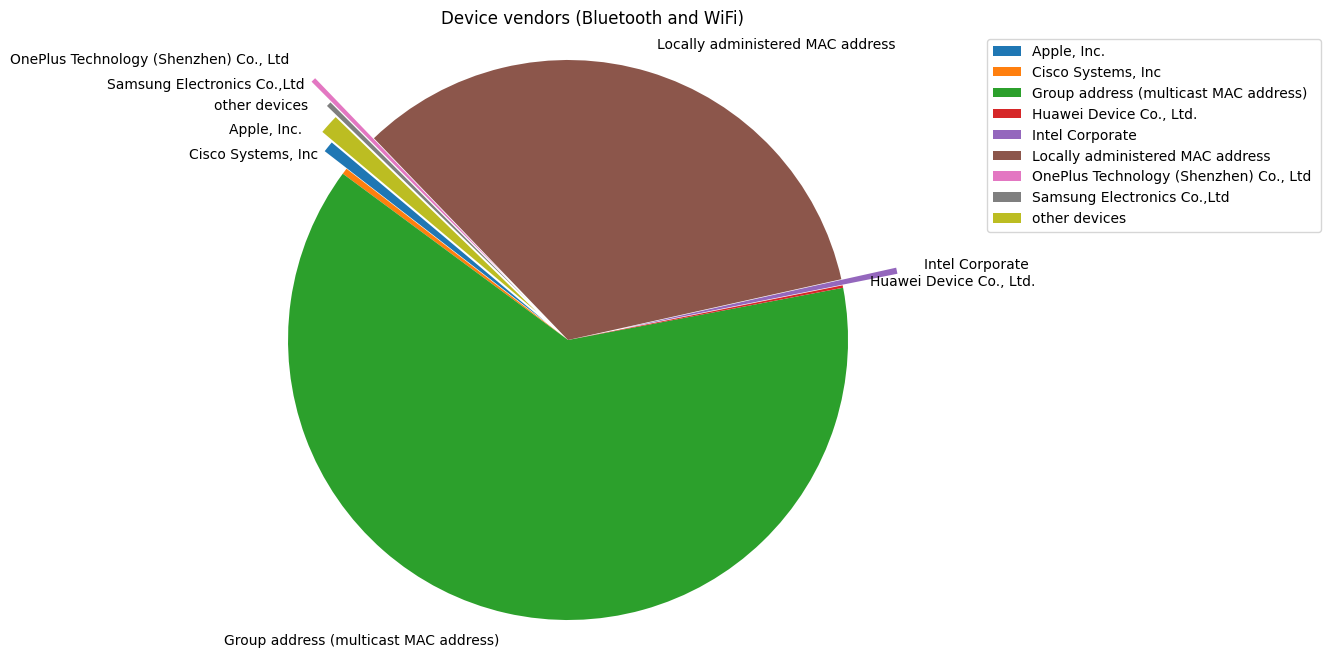

In [10]:
plt.figure(figsize=(10, 8))

explode = (0.1, 0, 0, 0, 0.2, 0, 0.3, 0.2, 0.15)  # Beispiel: Das erste Kuchenstück wird etwas getrennt
plt.pie(vendorCountReport['count'], labels=vendorCountReport['name'], startangle=140, explode=explode)
#plt.pie(vendorCountReport['count'], labels=vendorCountReport['name'], autopct='%1.1f%%', startangle=140)
plt.legend(vendorCountReport['name'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Device vendors (Bluetooth and WiFi)')
plt.axis('equal')

# Zeige das Kuchendiagramm an
plt.show()